In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("WineQT.csv")

In [3]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [4]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [5]:
df["quality"]=df["quality"].apply(lambda x: "Good" if x>=7 else "Bad")

In [6]:
#Encode labels(Bad=0, Good=1)
label_encoder=LabelEncoder()
df["quality"]=label_encoder.fit_transform(df["quality"])

In [7]:
#Split data into featuers and target
x=df.drop(columns=["quality"])
y=df["quality"]

In [8]:
#Train-test split(80% train, 20%test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
#Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
#SVM model
svm_model = SVC(probability = True, random_state=42)

In [11]:
#Hyperparameter Tuning(GridSearchCV)
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["rbf"]
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring="accuracy", verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [12]:
#Best model
best_model = grid_search.best_estimator_
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [13]:
#Model evaluation
y_prediction = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_prediction)
print(f"Final Model Accuracy after Hyperparameter Tuning: {accuracy: .4f}")
print(classification_report(y_test, y_prediction))

Final Model Accuracy after Hyperparameter Tuning:  0.8996
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       197
           1       0.80      0.38      0.51        32

    accuracy                           0.90       229
   macro avg       0.85      0.68      0.73       229
weighted avg       0.89      0.90      0.88       229



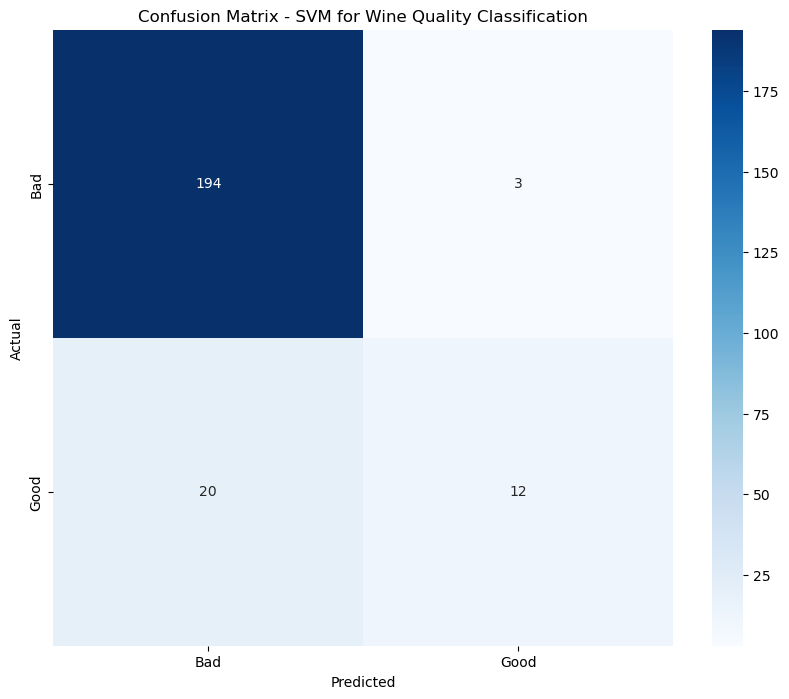

In [14]:
#Visualization
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM for Wine Quality Classification")
plt.show()

In [15]:
#Shap (couldn't import model error fix)
def model_predict(x):
    return best_model.predict_proba(x)

In [ ]:
#KernelExplainer for shap
explainer = shap.KernelExplainer(model_predict, x_train[:100])
shap_values = explainer.shap_values(x_test[:100])

In [ ]:
#Summary plot using shap
shap.summary_plot(shap_values, x_test[:100], feature_names=df.drop(columns=["quality"]).columns)